<a href="https://colab.research.google.com/github/godlygodzilla/ai-4.0/blob/main/assignment5/catsVSdogs_resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import tensorflow as tf
from tensorflow import keras
from keras.applications import ResNet50
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator

img_width, img_height = 224, 224


base_model = ResNet50(weights='imagenet', include_top=False)
# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip

--2023-10-15 17:16:57--  https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.143.207, 173.194.79.207, 108.177.119.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.143.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip.1’

cats_and_dogs_filte 100%[===================>]  65.43M  30.0MB/s    in 2.2s    

2023-10-15 17:16:59 (30.0 MB/s) - ‘cats_and_dogs_filtered.zip.1’ saved [68606236/68606236]



In [ ]:
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Extract the archive
zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

# Define our example directories and files
base_dir = 'tmp/cats_and_dogs_filtered'

train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'validation')

# Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator()


test_datagen = ImageDataGenerator()

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary',
                                                    target_size = (img_width, img_height))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary',
                                                          target_size = (img_width, img_height))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# Train the model.
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 10,
            validation_steps = 50,
            verbose = 1)

Epoch 1/10
100/100 [==============================] - 16s 122ms/step - loss: 0.2121 - accuracy: 0.9400 - val_loss: 0.1013 - val_accuracy: 0.9670
Epoch 2/10
100/100 [==============================] - 11s 112ms/step - loss: 0.0490 - accuracy: 0.9845 - val_loss: 0.1011 - val_accuracy: 0.9730
Epoch 3/10
100/100 [==============================] - 11s 113ms/step - loss: 0.0566 - accuracy: 0.9820 - val_loss: 0.0805 - val_accuracy: 0.9780
Epoch 4/10
100/100 [==============================] - 13s 128ms/step - loss: 0.0283 - accuracy: 0.9885 - val_loss: 0.0874 - val_accuracy: 0.9770
Epoch 5/10
100/100 [==============================] - 13s 128ms/step - loss: 0.0158 - accuracy: 0.9935 - val_loss: 0.1909 - val_accuracy: 0.9500
Epoch 6/10
100/100 [==============================] - 11s 114ms/step - loss: 0.0097 - accuracy: 0.9960 - val_loss: 0.0989 - val_accuracy: 0.9740
Epoch 7/10
100/100 [==============================] - 11s 114ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0931 - val_ac

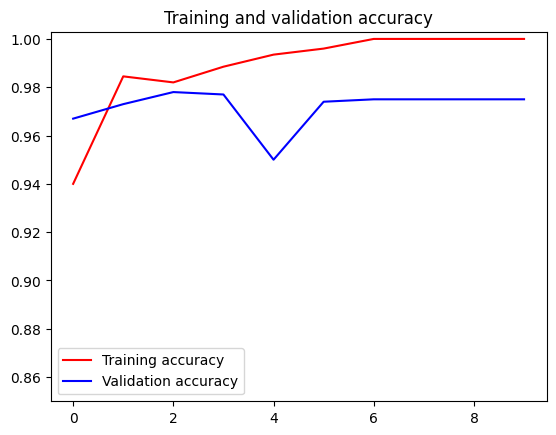

<Figure size 640x480 with 0 Axes>

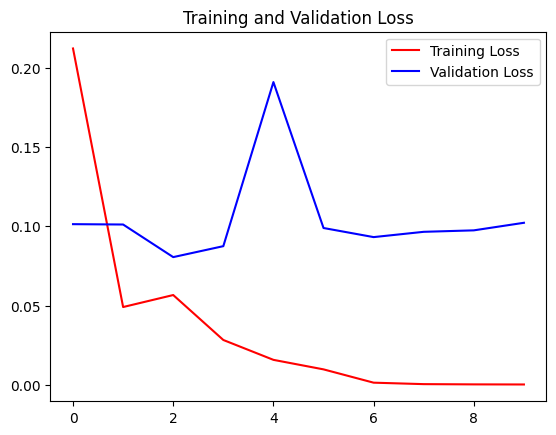

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.ylim(0.85)
plt.legend(loc=0)
plt.figure()


plt.show()


plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')


plt.legend()
plt.show()